# Final Project Kecerdasan Komputasional

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from pso import ParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
from kmeans import KMeans
from utils import maximum_absolute_scaling
from utils import normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
sheet_id = '16HetPmo8PWV04swt4Qka0TrJySokk4j8V_ZNOxtjiDE'
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8942,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8943,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8944,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Normalization

In [ ]:
df = df.drop([0, 2, 3, 13, 14], axis=1)
df

,1,4,5,6,7,8,9,10,11,12,15,16
0,0.818182,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,0.000000,12
1,0.909091,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,0.222222,12
2,1.000000,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,0.000000,12
3,0.636364,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,12
4,1.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...
8941,1.000000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.500000,6
8942,1.000000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,0.000000,6
8943,0.833333,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,0.250000,6
8944,0.833333,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,0.250000,6


In [ ]:
df = df.fillna(0)
df.isnull()

,1,4,5,6,7,8,9,10,11,12,15,16
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8941,False,False,False,False,False,False,False,False,False,False,False,False
8942,False,False,False,False,False,False,False,False,False,False,False,False
8943,False,False,False,False,False,False,False,False,False,False,False,False
8944,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = maximum_absolute_scaling(df)
df

,1,4,5,6,7,8,9,10,11,12,15,16
0,0.818182,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.033333,0.000000,1.0
1,0.909091,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.233333,0.222222,1.0
2,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.250000,0.000000,1.0
3,0.636364,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.250000,0.000000,1.0
4,1.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.040000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8941,1.000000,0.012939,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.500000,0.5
8942,1.000000,0.013333,0.000000,1.000000,0.000000,0.833333,0.000000,0.00000,0.016760,0.033333,0.000000,0.5
8943,0.833333,0.006418,0.000000,0.833333,0.000000,0.666667,0.000000,0.00000,0.013966,0.033333,0.250000,0.5
8944,0.833333,0.000000,0.000776,0.000000,0.000000,0.000000,0.111111,0.01626,0.000000,0.016667,0.250000,0.5


In [ ]:
# file_name = 'delete lebih besar dari 1 setelah hapus kolom 2.xlsx'
# df.to_excel(file_name)

In [ ]:
x = df
x = x.values

# SSE

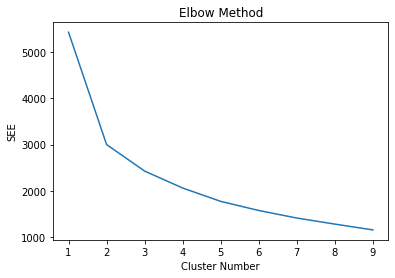

In [ ]:
SSE = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 2021)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)
plt.plot(range(1, 10), SSE)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('SEE')
plt.show()

### K-Means

In [ ]:
from kmeans import KMeans

In [ ]:
%%time
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=3, init_pp=False, seed=2021)
    kmean_rep.fit(x)
    predicted_kmean_rep = kmean_rep.predict(x)
    silhouette = silhouette_score(x, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=x, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)

CPU times: user 31.4 s, sys: 2.2 s, total: 33.6 s
Wall time: 29.9 s


### PSO 

In [ ]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=False, max_iter=8, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2021)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)

print (np.around(np.mean(pso_plain['sse']), decimals=10))
print (np.around(np.mean(pso_plain['silhouette']), decimals=10))
print (np.around(np.mean(pso_plain['quantization']), decimals=10))

Initial global best score 0.5794618032338695
Iteration 0001/0008 current gbest score 0.555918879880151540


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.502658213443204716
Initial global best score 0.5349053421169058
Iteration 0001/0008 current gbest score 0.534905342116905769
Finish with gbest score 0.513306718246274163
Initial global best score 0.5487966386259626
Iteration 0001/0008 current gbest score 0.548796638625962618
Finish with gbest score 0.514714923553012738
Initial global best score 0.6064407455520686
Iteration 0001/0008 current gbest score 0.576248314191863620
Finish with gbest score 0.555407949399136291
Initial global best score 0.5634740417115968
Iteration 0001/0008 current gbest score 0.553461891772568548
Finish with gbest score 0.518317050339926699
Initial global best score 0.5466619200104316
Iteration 0001/0008 current gbest score 0.521314485824536322


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.521314485824536322
Initial global best score 0.5504097055977196
Iteration 0001/0008 current gbest score 0.550409705597719623
Finish with gbest score 0.520023566819184824
Initial global best score 0.5533183908528801
Iteration 0001/0008 current gbest score 0.553318390852880149
Finish with gbest score 0.532953592509227358
Initial global best score 0.5421448819070767
Iteration 0001/0008 current gbest score 0.542144881907076659
Finish with gbest score 0.516986773243146014
Initial global best score 0.5302254369352731
Iteration 0001/0008 current gbest score 0.530225436935273131
Finish with gbest score 0.496089976454939574
Initial global best score 0.5407101786042251
Iteration 0001/0008 current gbest score 0.540710178604225100
Finish with gbest score 0.518753455726058132
Initial global best score 0.5610586461598345
Iteration 0001/0008 current gbest score 0.561058646159834473


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.508165724210865366
Initial global best score 0.5207151555672352
Iteration 0001/0008 current gbest score 0.520715155567235244
Finish with gbest score 0.492517059182192296
Initial global best score 0.5422507904703157
Iteration 0001/0008 current gbest score 0.525467330031069824


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.506302787829088663
Initial global best score 0.5663528007094575
Iteration 0001/0008 current gbest score 0.566352800709457482
Finish with gbest score 0.540320319726457332
Initial global best score 0.5491363163908348
Iteration 0001/0008 current gbest score 0.500103883393163473
Finish with gbest score 0.500103883393163473
Initial global best score 0.5496179706519557
Iteration 0001/0008 current gbest score 0.544175165699177343
Finish with gbest score 0.499900356244228405
Initial global best score 0.5462172996594092
Iteration 0001/0008 current gbest score 0.546217299659409239


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.487568655907007820
Initial global best score 0.5527984940228191
Iteration 0001/0008 current gbest score 0.552798494022819109


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.516310118746030500
Initial global best score 0.5433646047559751
Iteration 0001/0008 current gbest score 0.543364604755975145


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.451749470710021417
3655.0041284522
0.2449408381
0.5106732541
CPU times: user 40.5 s, sys: 2.65 s, total: 43.2 s
Wall time: 39.5 s


### PSO Hybrid

In [ ]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=10, data=x, hybrid=True, max_iter=8, print_debug=2000)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2021)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(x)
    
    silhouette = silhouette_score(x, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=x, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)

print (np.around(np.mean(pso_hybrid['sse']), decimals=10))
print (np.around(np.mean(pso_hybrid['silhouette']), decimals=10))
print (np.around(np.mean(pso_hybrid['quantization']), decimals=10))

Initial global best score 0.4937386859543033
Iteration 0001/0008 current gbest score 0.493738685954303314
Finish with gbest score 0.485939966090786601
Initial global best score 0.5133896793787511
Iteration 0001/0008 current gbest score 0.513389679378751129
Finish with gbest score 0.513389679378751129
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.501762326630239897
Initial global best score 0.5336284186363854
Iteration 0001/0008 current gbest score 0.533628418636385438
Finish with gbest score 0.533628418636385438
Initial global best score 0.5133457046954025
Iteration 0001/0008 current gbest score 0.513345704695402527
Finish with gbest score 0.512191587442532126
Initial global best score 0.49015775324803296
Iteration 0001/0008 current gbest score 0.490157753248032957


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.485224664332857436
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.512344124096045572
Initial global best score 0.49369336494451826
Iteration 0001/0008 current gbest score 0.493693364944518265
Finish with gbest score 0.489848877702317720
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.508882524643814893
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.513267262639960475
Initial global best score 0.5057817168914432
Iteration 0001/0008 current gbest score 0.505781716891443245


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.473294790614439354
Initial global best score 0.507257991150757
Iteration 0001/0008 current gbest score 0.507257991150756982
Finish with gbest score 0.484880752058348186
Initial global best score 0.5207551757626798
Iteration 0001/0008 current gbest score 0.520755175762679823


/content/particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Finish with gbest score 0.505051539231741509
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.513339384392413556
Initial global best score 0.5133706570635375
Iteration 0001/0008 current gbest score 0.513370657063537461
Finish with gbest score 0.512115992696058231
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.513388685775239995
Initial global best score 0.5133706570635375
Iteration 0001/0008 current gbest score 0.513370657063537461
Finish with gbest score 0.513370657063537461
Initial global best score 0.5133810799192826
Iteration 0001/0008 current gbest score 0.513381079919282612
Finish with gbest score 0.510701232730761401
Initial global best score 0.51338868577524
Iteration 0001/0008 current gbest score 0.513388685775239995
Finish with gbest score 0.511901272049398059
Initial global best score 0.51338868577524
Iteration 00

# Comparison

In [ ]:
benchmark = {
    'method' : ['K-Means', 'PSO', 'Hybrid'],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
}

In [ ]:
benchmark

{'method': ['K-Means', 'PSO', 'Hybrid'],
 'quantization_mean': [0.4945642881, 0.5176936075, 0.5053956212],
 'silhouette_mean': [0.3493884244, 0.2333803773, 0.347202345],
 'sse_mean': [2624.7348778774, 3514.362230356, 2779.4926099726]}

In [ ]:
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

,method,sse_mean,silhouette_mean,quantization_mean
0,K-Means,2624.734878,0.349388,0.494564
1,PSO,3514.362230,0.233380,0.517694
2,Hybrid,2779.492610,0.347202,0.505396
